# 81.COLUMNS:SalePrice ANALYSIS(REGRESSION)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\81 column dataset.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

df.isnull().sum()

# spliting the data and filling null values

In [9]:
numerical_col=df.select_dtypes(include=[np.number])
numerical_col

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [10]:
numerical_col.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [11]:
categorical_col=df.select_dtypes(include=[object])
categorical_col

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
categorical_col.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [13]:
categorical_col=categorical_col.fillna(categorical_col.mode().iloc[0])

In [14]:
categorical_col.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [15]:
categorical_col.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [16]:
numerical_col=numerical_col.fillna(numerical_col.mean())

In [17]:
numerical_col.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# merging the num_col and cat_col

In [18]:
df1 = pd.concat([numerical_col, categorical_col], axis=1)

In [19]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [20]:
df1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir

# outlayers with IQR

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'Id'),
  Text(1, 0, 'MSSubClass'),
  Text(2, 0, 'LotFrontage'),
  Text(3, 0, 'LotArea'),
  Text(4, 0, 'OverallQual'),
  Text(5, 0, 'OverallCond'),
  Text(6, 0, 'YearBuilt'),
  Text(7, 0, 'YearRemodAdd'),
  Text(8, 0, 'MasVnrArea'),
  Text(9, 0, 'BsmtFinSF1'),
  Text(10, 0, 'BsmtFinSF2'),
  Text(11, 0, 'BsmtUnfSF'),
  Text(12, 0, 'TotalBsmtSF'),
  Text(13, 0, '1stFlrSF'),
  Text(14, 0, '2ndFlrSF'),
  Text(15, 0, 'LowQualFinSF'),
  Text(16, 0, 'GrLivArea'),
  Text(17, 0, 'BsmtFullBath'),
  Text(18, 0, 'BsmtHalfBath'),
  Text(19, 0, 'FullBath'),
  Text(20, 0, 'HalfBath'),
  Text(21, 0, 'BedroomAbvGr'),
  Text(22, 0, 'KitchenAbvGr'),
  Text(23, 0, 'TotRmsAbvGrd'),
  Text(24, 0, 'Fireplaces'),
  Text(25, 0, 'GarageYrBlt'),
  Text(26, 0, 'GarageCars'),
  Text(27, 

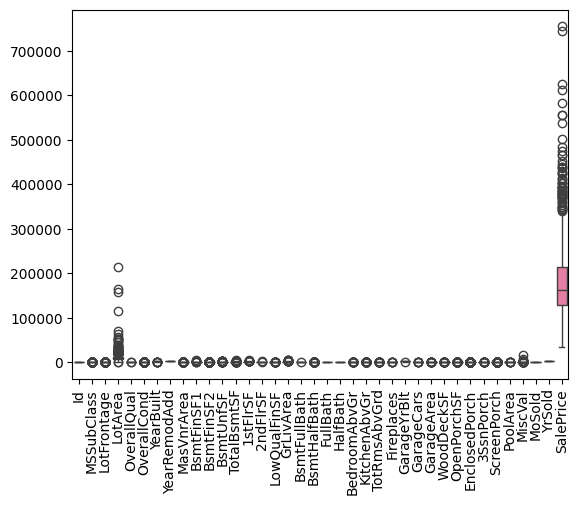

In [21]:
sns.boxplot(data=df1)
plt.xticks(rotation=90)

In [22]:
def wisker(col):
   q1=df1[col].quantile(0.25)
   q3=df1[col].quantile(0.75)
   iqr=q3-q1
   lower=q1-(1.5*iqr)
   upper=q3+(1.5*iqr)
   return lower,upper

In [23]:
for i in df1.select_dtypes(include=['number']).columns:
  lower,upper=wisker(i)
  df1[i]=np.where(df1[i]<lower,lower,df1[i])   
  df1[i]=np.where(df1[i]>upper,upper,df1[i])

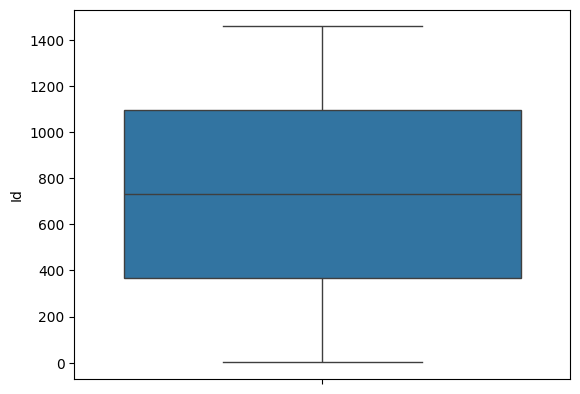

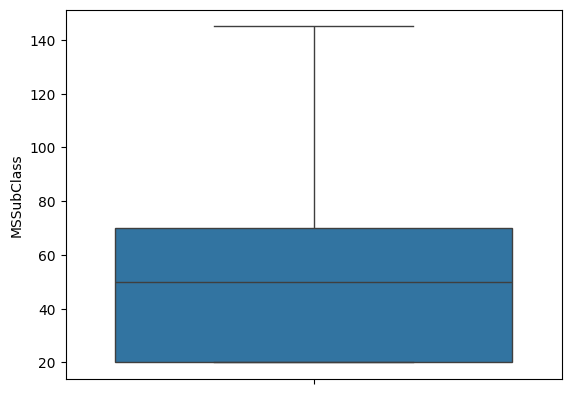

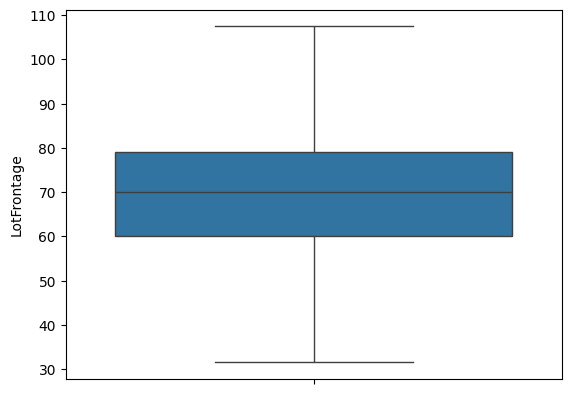

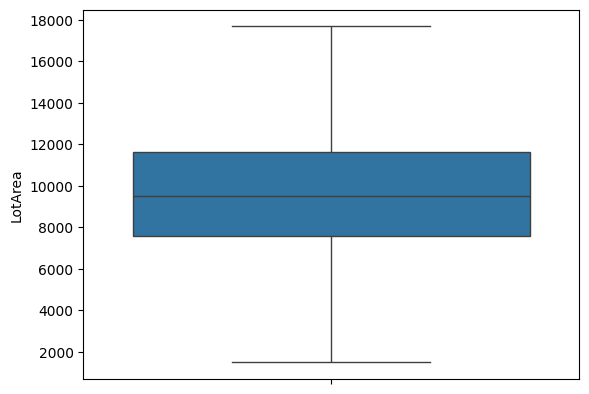

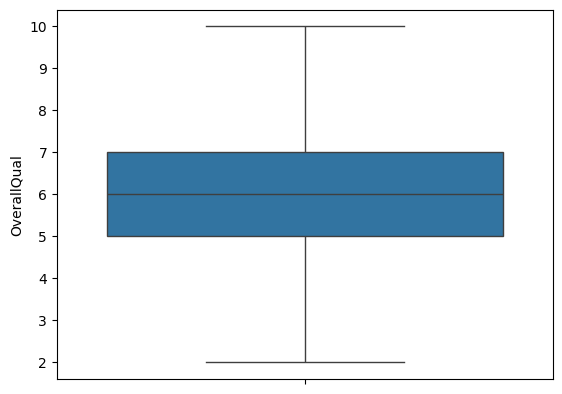

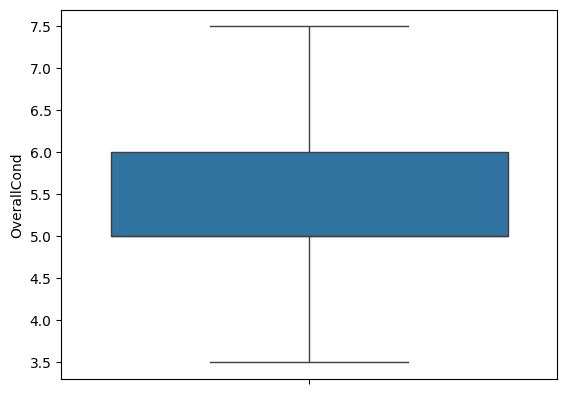

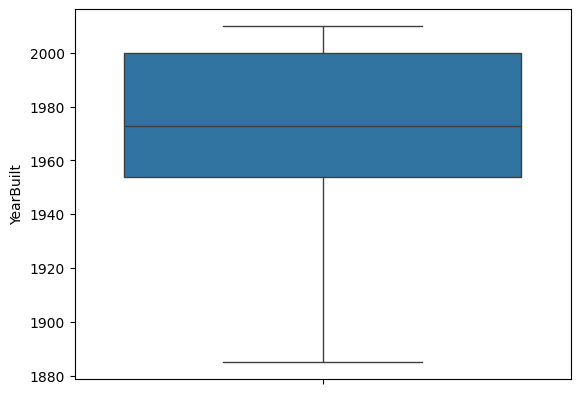

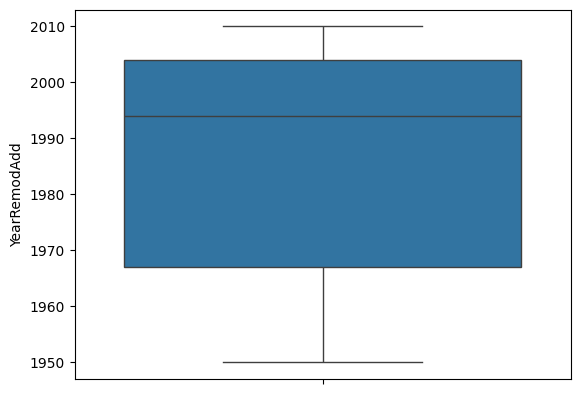

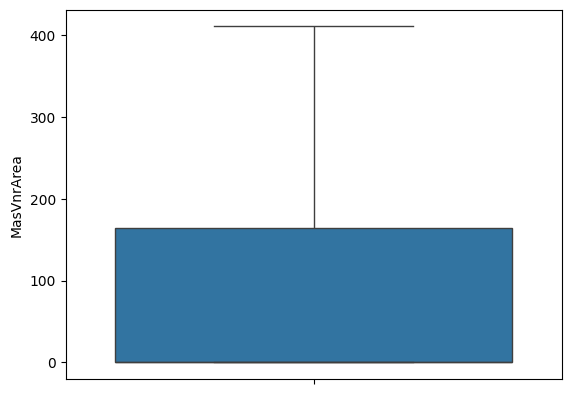

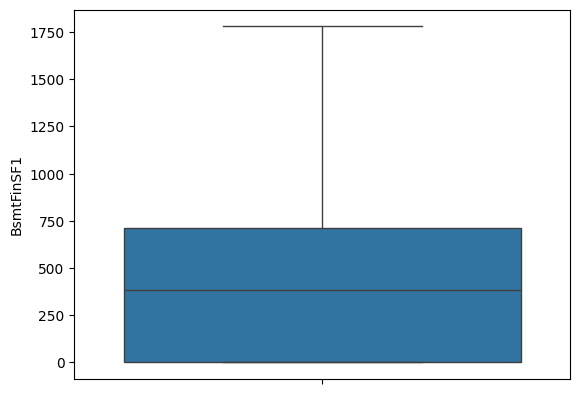

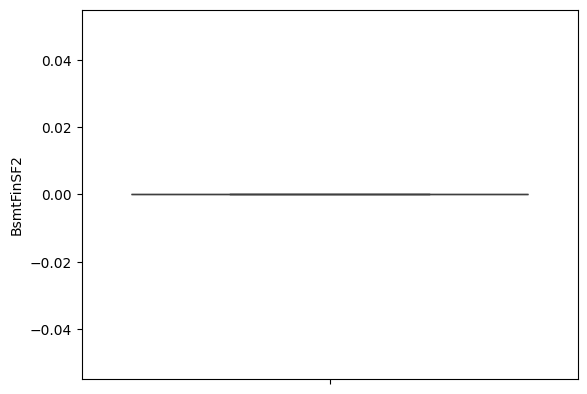

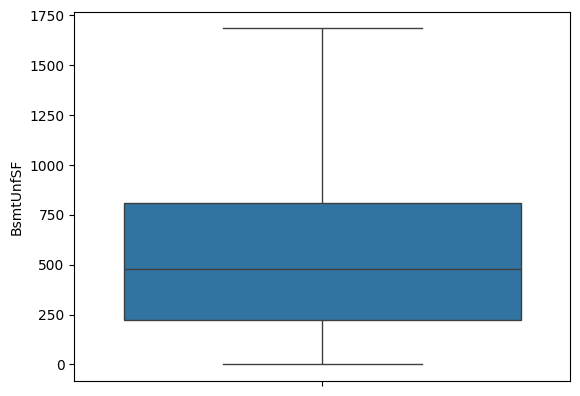

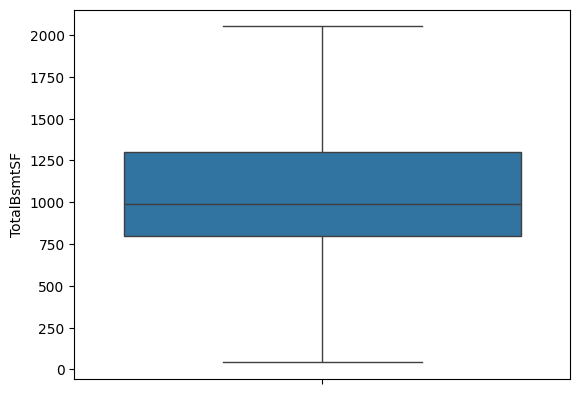

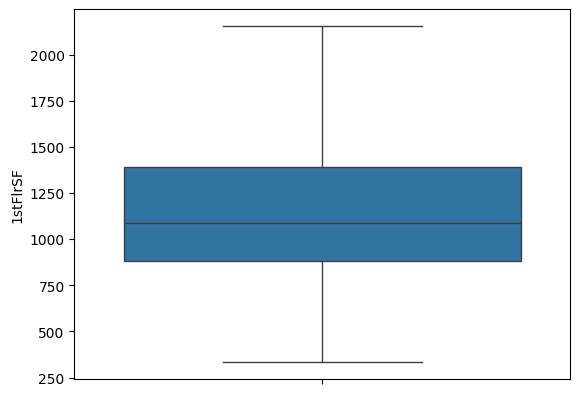

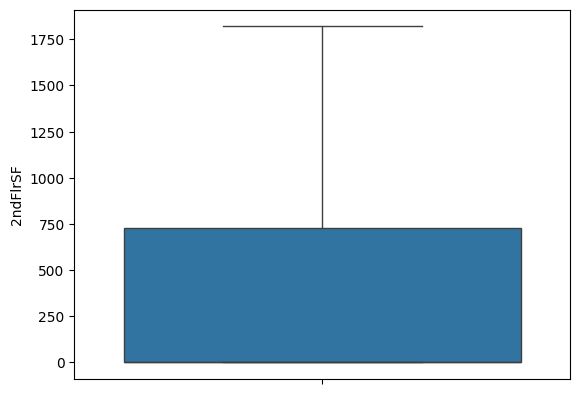

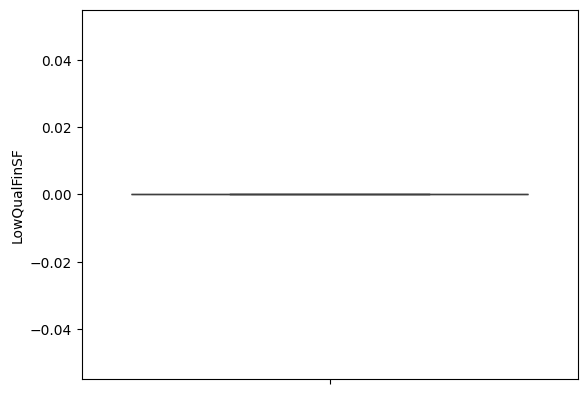

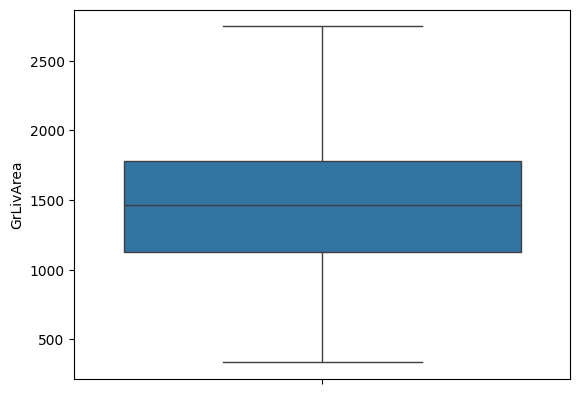

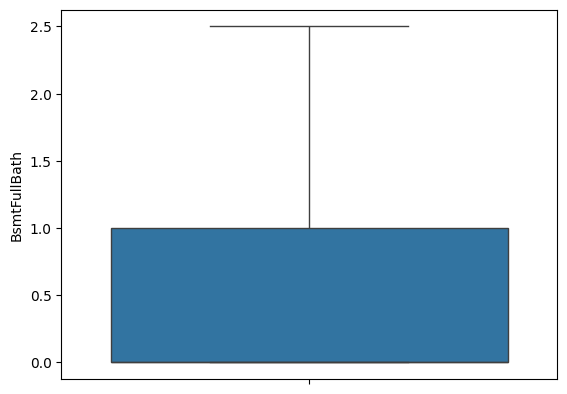

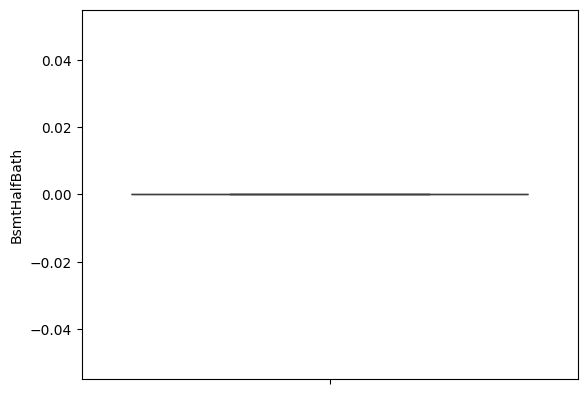

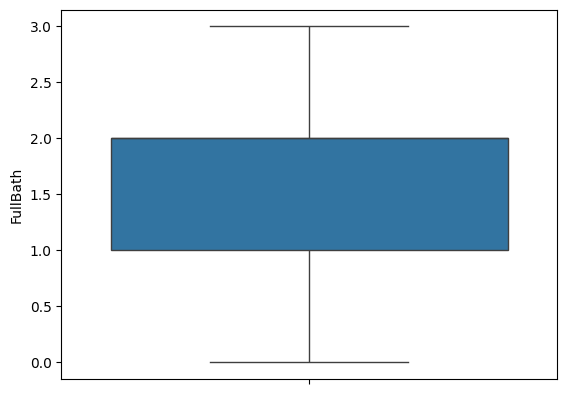

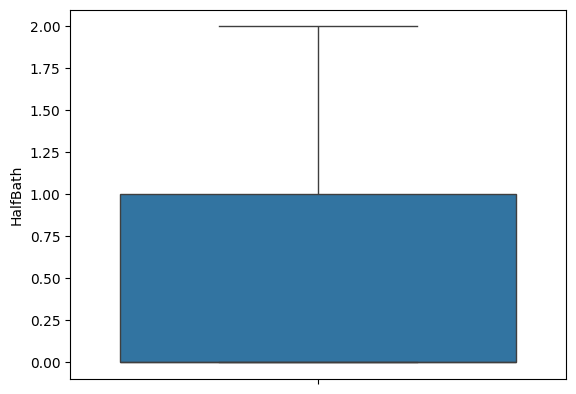

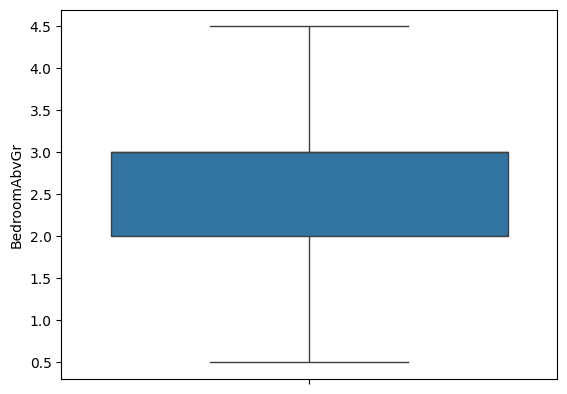

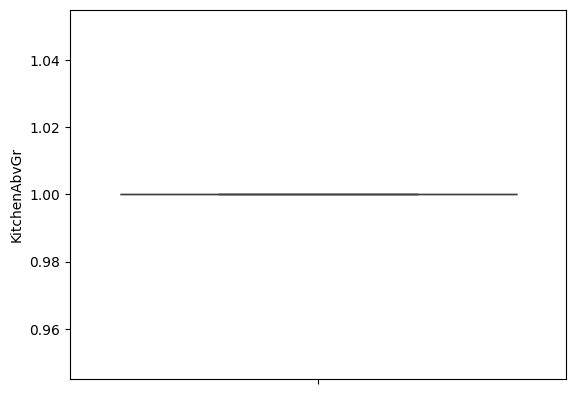

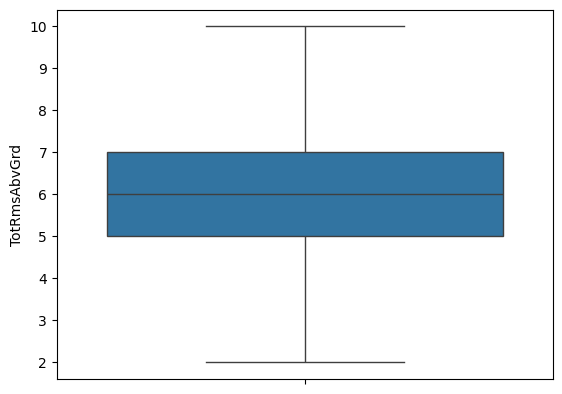

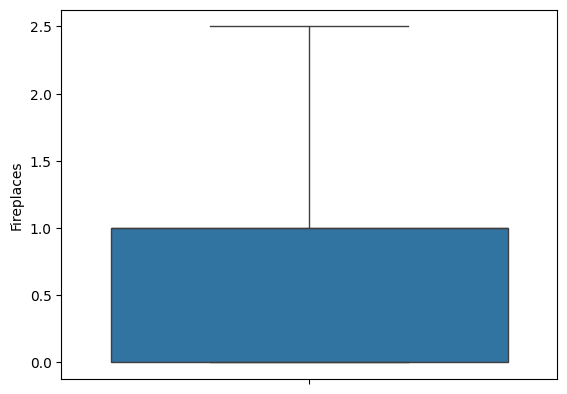

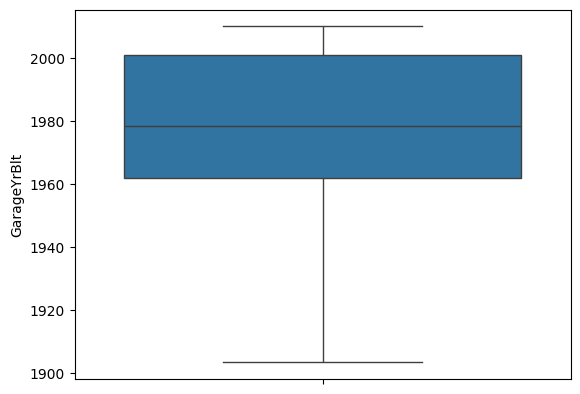

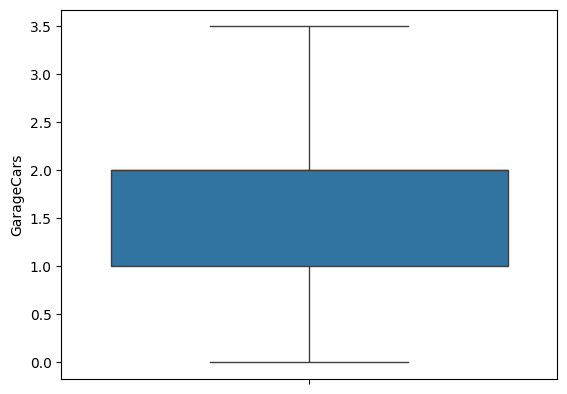

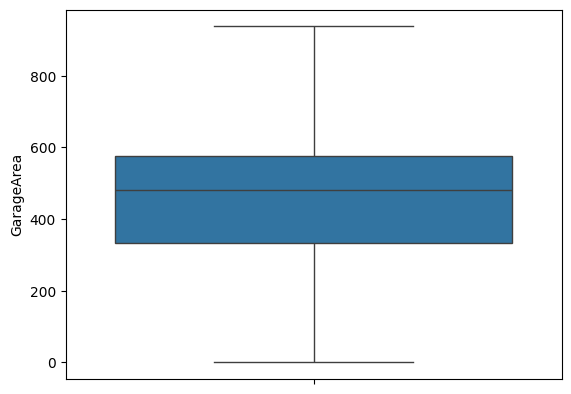

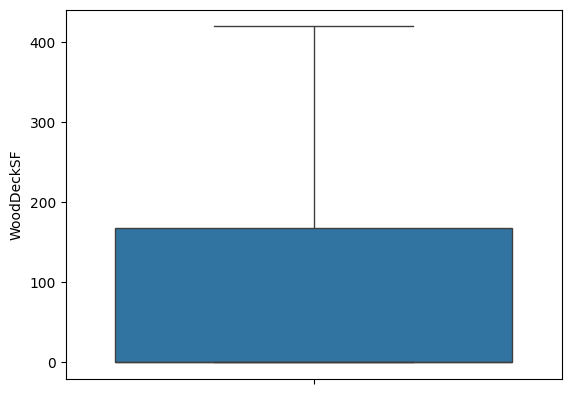

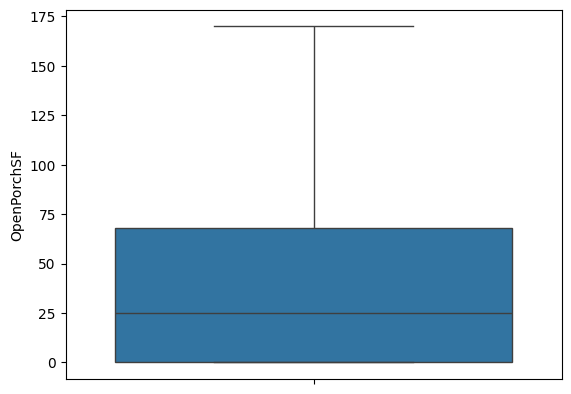

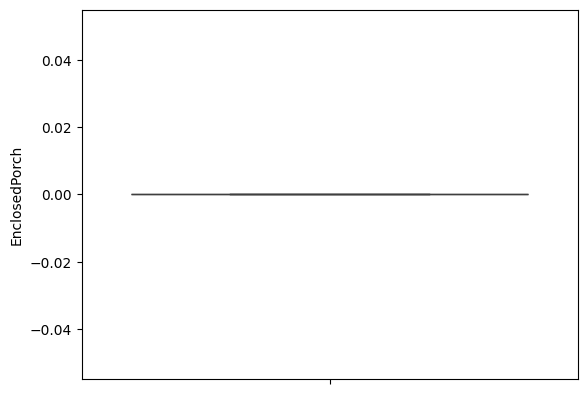

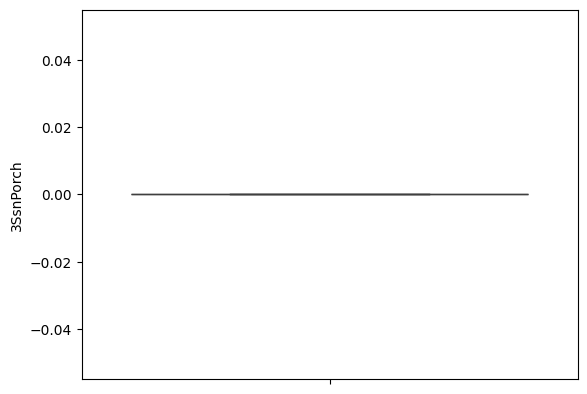

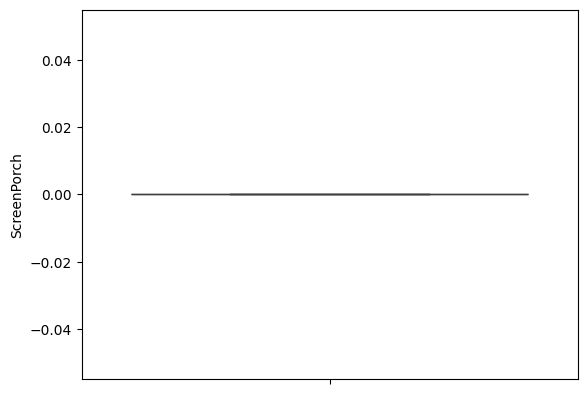

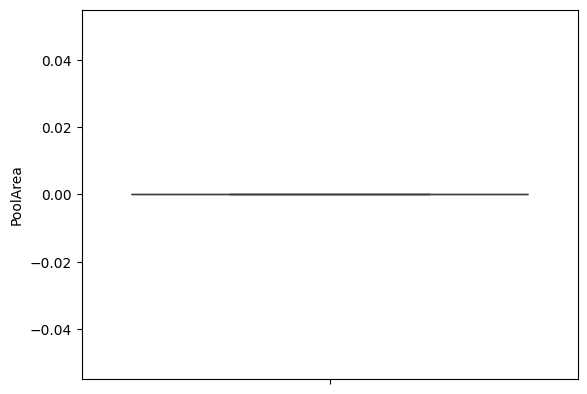

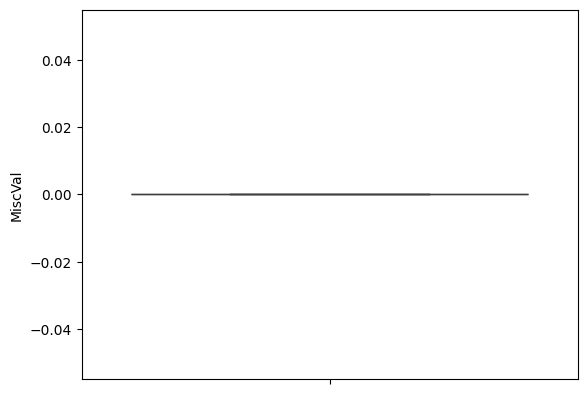

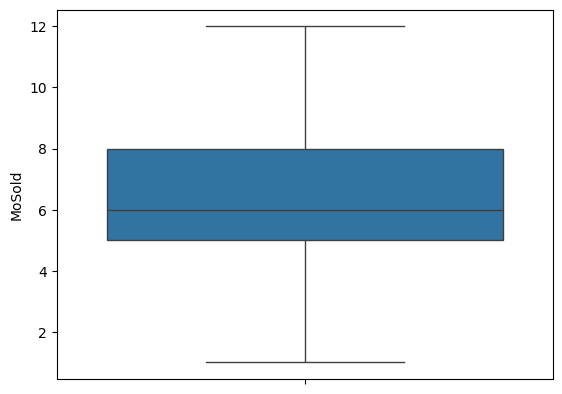

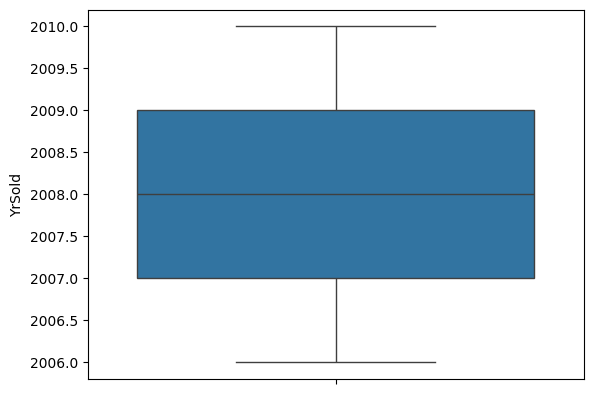

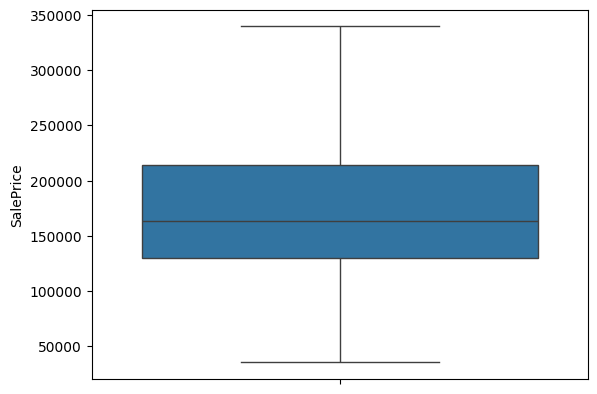

In [24]:
for col in df1.select_dtypes(include="number").columns:
  sns.boxplot(df1[col])
  plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'Id'),
  Text(1, 0, 'MSSubClass'),
  Text(2, 0, 'LotFrontage'),
  Text(3, 0, 'LotArea'),
  Text(4, 0, 'OverallQual'),
  Text(5, 0, 'OverallCond'),
  Text(6, 0, 'YearBuilt'),
  Text(7, 0, 'YearRemodAdd'),
  Text(8, 0, 'MasVnrArea'),
  Text(9, 0, 'BsmtFinSF1'),
  Text(10, 0, 'BsmtFinSF2'),
  Text(11, 0, 'BsmtUnfSF'),
  Text(12, 0, 'TotalBsmtSF'),
  Text(13, 0, '1stFlrSF'),
  Text(14, 0, '2ndFlrSF'),
  Text(15, 0, 'LowQualFinSF'),
  Text(16, 0, 'GrLivArea'),
  Text(17, 0, 'BsmtFullBath'),
  Text(18, 0, 'BsmtHalfBath'),
  Text(19, 0, 'FullBath'),
  Text(20, 0, 'HalfBath'),
  Text(21, 0, 'BedroomAbvGr'),
  Text(22, 0, 'KitchenAbvGr'),
  Text(23, 0, 'TotRmsAbvGrd'),
  Text(24, 0, 'Fireplaces'),
  Text(25, 0, 'GarageYrBlt'),
  Text(26, 0, 'GarageCars'),
  Text(27, 

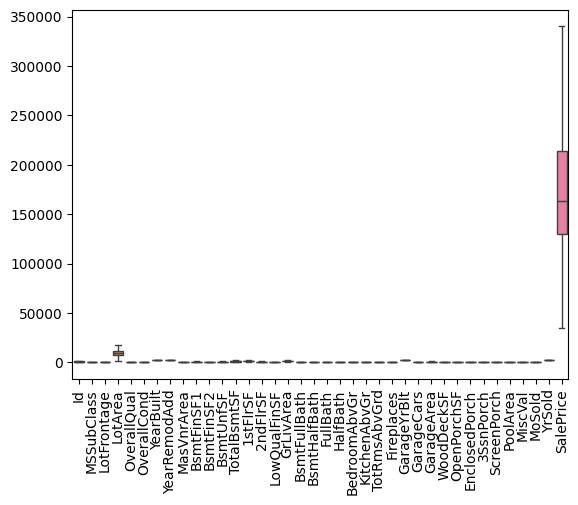

In [26]:
sns.boxplot(data=df1)
plt.xticks(rotation=90)

# Encoding with LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df1.select_dtypes(include=[object]).columns:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    label_encoders[column] = le


In [29]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,1,1,4,4,2,2,2,2,8,4
1,2.0,20.0,80.0,9600.0,6.0,7.5,1976.0,1976.0,0.0,978.0,...,1,1,4,4,2,2,2,2,8,4
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,1,1,4,4,2,2,2,2,8,4
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,5,2,4,4,2,2,2,2,8,0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,1,1,4,4,2,2,2,2,8,4


In [30]:
#df_cleaned = df.drop(outliers_LotArea.index)

# Display the shape of the cleaned dataset to confirm the removal
#df_cleaned.shape

# scaling with MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
numerical_cols = df1.select_dtypes(include=[np.number]).columns
categorical_cols = df1.select_dtypes(include=[object]).columns
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])


In [32]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.000000,0.32,0.440789,0.430367,0.625,0.375,0.944,0.883333,0.477321,0.396490,...,0.2,0.5,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.8
1,0.000685,0.00,0.638158,0.501390,0.500,1.000,0.728,0.433333,0.000000,0.549245,...,0.2,0.5,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.8
2,0.001371,0.32,0.480263,0.603292,0.625,0.375,0.928,0.866667,0.394521,0.272938,...,0.2,0.5,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.8
3,0.002056,0.40,0.375000,0.498302,0.625,0.375,0.240,0.333333,0.000000,0.121306,...,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.0
4,0.002742,0.32,0.690789,0.789186,0.750,0.375,0.920,0.833333,0.852359,0.367848,...,0.2,0.5,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.8


In [33]:
#df3 = df2.drop('MSZoning', axis=1)

In [34]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.000000,0.32,0.440789,0.430367,0.625,0.375,0.944,0.883333,0.477321,0.396490,...,0.2,0.5,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.8
1,0.000685,0.00,0.638158,0.501390,0.500,1.000,0.728,0.433333,0.000000,0.549245,...,0.2,0.5,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.8
2,0.001371,0.32,0.480263,0.603292,0.625,0.375,0.928,0.866667,0.394521,0.272938,...,0.2,0.5,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.8
3,0.002056,0.40,0.375000,0.498302,0.625,0.375,0.240,0.333333,0.000000,0.121306,...,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.0
4,0.002742,0.32,0.690789,0.789186,0.750,0.375,0.920,0.833333,0.852359,0.367848,...,0.2,0.5,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,0.8


# model building and mlflow

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [8,5]

In [36]:
x = df1.drop(['SalePrice'],axis=1) #input features
y = df1['SalePrice'] # target variable

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
df1.shape

(1460, 81)

In [41]:
x_train.shape

(1168, 80)

In [42]:
x_test.shape

(292, 80)

In [43]:
lin_reg=LinearRegression()

In [44]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [45]:
lin_reg.coef_

array([-1.06852411e-02, -4.92299773e-02, -1.26385322e-02,  5.78764181e-02,
        2.67799377e-01,  8.28594694e-02,  9.03032349e-02,  2.71439169e-02,
        4.01268915e-03, -6.10757240e-02, -2.23915961e+12, -1.33266301e-01,
        2.49982978e-01, -1.17442026e-01, -7.33778253e-02, -1.75539763e+12,
        5.41193121e-01,  3.26018087e-02, -6.82990720e+10, -1.05733635e-02,
       -2.00920916e-02, -2.01742601e-02,  3.01158642e+11, -2.24557923e-02,
        5.45273731e-02,  4.50649831e-03,  9.30653065e-02,  1.92410894e-02,
        2.12551640e-02,  8.03984370e-03, -5.48268231e+10,  7.57858833e+10,
        2.60943786e+11,  1.53484047e+11, -2.44900222e+11, -1.49321112e-03,
       -7.79641191e-03, -5.11127505e-02,  3.13038089e-02, -2.11758942e-02,
       -8.97250547e-03,  2.18103206e-02, -7.97846120e-02,  5.74405950e-03,
        8.70082882e-02,  8.88604274e-03,  8.26756715e-03, -1.48092071e-01,
        1.58931503e-03, -4.17243326e-03,  6.00110065e-03,  3.91291748e-02,
       -5.84692884e-02,  

In [46]:
lin_reg.intercept_

-0.2350974000377956

In [47]:
y_pred=lin_reg.predict(x_test)
y_pred

array([ 0.38854192,  0.89795697,  0.25464508,  0.44929354,  0.87052606,
        0.1273402 ,  0.62593094,  0.32781624,  0.1175023 ,  0.34476353,
        0.37315253,  0.25909738,  0.19636708,  0.54909046,  0.44257534,
        0.34096576,  0.57051195,  0.32918943,  0.25305909,  0.62525648,
        0.32669194,  0.57955165,  0.46928994,  0.29601155,  0.57656406,
        0.42124997,  0.53943166,  0.20861858,  0.45850034,  0.5215049 ,
        0.425014  ,  0.71825468,  0.53755886,  0.24516415,  0.69453905,
        0.41402588,  0.2883769 ,  0.58384724,  0.8290944 ,  0.19798584,
        0.32676985,  0.6918671 ,  0.25774651,  0.87574613,  0.31198612,
        0.37883984,  0.22670679,  0.32785079,  1.04794162,  0.31444034,
        0.25828737,  0.64080442,  0.27011719,  0.90454055,  0.39387647,
        0.68983237,  0.58629427,  0.43271133,  0.28305498,  0.22253145,
        0.01442942,  0.43581878,  0.83031848,  0.73546444,  0.762322  ,
        0.59664061,  0.23739783,  0.83495704,  0.24338302,  0.42

In [48]:
mean_squared_error(y_pred,y_test)

0.005460431601403203

In [49]:
r2_score(y_pred,y_test)

0.8881428316286879

#mlflow

In [51]:
import mlflow

In [52]:
import os
os.environ["git_python_refresh"]="quiet"
os.environ["mlflow_tracking_uri"]="file:///Users/user/OneDrive/Desktop/mlflow"

In [53]:
mlflow.set_experiment("SalePrice-analysis")
mlflow.set_experiment_tag("SalePrice-tag","ex1")

In [54]:
with mlflow.start_run():
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

     # model object initialization
    RandFor = RandomForestRegressor(n_estimators=5000, max_depth=6)
    GBM = GradientBoostingRegressor(n_estimators=3000, max_depth=6, learning_rate=0.01, min_samples_split=5)
    LinReg = LinearRegression()

    rf_n_estimators = 5000
    
    # logging parameters
    mlflow.log_param("rf_n_estimators", rf_n_estimators)
    mlflow.log_param('rf_max_depth', 6)
    mlflow.log_param('gbm_n_estimators', 3000)
    mlflow.log_param('gbm_max_depth', 6)
    mlflow.log_param('gbm_learning_rate', 0.01)
    mlflow.log_param('gbm_minimum_samples_split', 5)

    # training models
    rf = RandFor.fit(x_train, y_train)
    gbm = GBM.fit(x_train, y_train)
    lr = LinReg.fit(x_train, y_train)
 # training scores
    training_score_rf = rf.score(x_train, y_train)
    training_score_gbm = gbm.score(x_train, y_train)
    training_score_lr = lr.score(x_train, y_train)
    
    # logging training scores
    mlflow.log_metric("rf_training_score_r2", training_score_rf)
    mlflow.log_metric("gbm_training_score_r2", training_score_gbm)
    mlflow.log_metric("lr_training_score_r2", training_score_lr)

    # value predictions
    y_pred_rf = rf.predict(x_test)
    y_pred_gbm = gbm.predict(x_test)
    y_pred_lr = lr.predict(x_test)

    # prediction evaluations
    testing_score_rf = r2_score(y_test, y_pred_rf)
    testing_score_gbm = r2_score(y_test, y_pred_gbm)
    testing_score_lr = r2_score(y_test, y_pred_lr)
    
    # logging evaluation scores
    mlflow.log_metric("rf_testing_score_r2", testing_score_rf)
    mlflow.log_metric("gbm_testing_score_r2", testing_score_gbm)
    mlflow.log_metric("lr_testing_score_r2", testing_score_lr)
    # training metrics
    rf_train_mse = mean_squared_error(y_train, rf.predict(x_train))
    gbm_train_mse = mean_squared_error(y_train, gbm.predict(x_train))
    lr_train_mse = mean_squared_error(y_train, lr.predict(x_train))
    
    rf_train_mae = mean_absolute_error(y_train, rf.predict(x_train))
    gbm_train_mae = mean_absolute_error(y_train, gbm.predict(x_train))
    lr_train_mae = mean_absolute_error(y_train, lr.predict(x_train))

    # logging training metrics
    mlflow.log_metric("rf_training_mse", rf_train_mse)
    mlflow.log_metric("gbm_training_mse", gbm_train_mse)
    mlflow.log_metric("lr_training_mse", lr_train_mse)
    
    mlflow.log_metric("rf_training_mae", rf_train_mae)
    mlflow.log_metric("gbm_training_mae", gbm_train_mae)
    mlflow.log_metric("lr_training_mae", lr_train_mae)

    # testing metrics
    rf_test_mse = mean_squared_error(y_test, y_pred_rf)
    gbm_test_mse = mean_squared_error(y_test, y_pred_gbm)
    lr_test_mse = mean_squared_error(y_test, y_pred_lr)
    
    rf_test_mae = mean_absolute_error(y_test, y_pred_rf)
    gbm_test_mae = mean_absolute_error(y_test, y_pred_gbm)
    lr_test_mae = mean_absolute_error(y_test, y_pred_lr)
# logging testing metrics
    mlflow.log_metric("rf_testing_mse", rf_test_mse)
    mlflow.log_metric("gbm_testing_mse", gbm_test_mse)
    mlflow.log_metric("lr_testing_mse", lr_test_mse)
    
    mlflow.log_metric("rf_testing_mae", rf_test_mae)
    mlflow.log_metric("gbm_testing_mae", gbm_test_mae)
    mlflow.log_metric("lr_testing_mae", lr_test_mae)
    
    # logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")
    mlflow.sklearn.log_model(lr, "linear-regression-model")

C:\Users\user\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [56]:
import requests
import json
import pandas as pd


df2={'dataframe_records': pd.DataFrame(x_test).values.tolist()}
headers={"Content-Type": "application/json"}

response = requests.post("http://localhost:8102/invocations",data=json.dumps(df2),headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [0.2828196953566326, 0.40088436635697355, 0.24334828974805323, 0.2352484877321442, 0.4029794502576622, 0.09960721902144404, 0.2733288905365787, 0.20710080115126203, 0.08617174815223147, 0.22518112650197114, 0.28708629328654006, 0.23008973306905786, 0.16517529708888518, 0.30658824258857187, 0.2047938973331993, 0.2471255628846026, 0.23696710761252437, 0.23487776473357638, 0.1915716766847856, 0.24392363045868337, 0.2563394098234855, 0.35480089450812197, 0.21627471053645872, 0.20285024766007104, 0.25137962971546207, 0.2621047377336716, 0.22713410829171793, 0.15661933266542102, 0.2037214113120549, 0.30553369427666, 0.21960238546287655, 0.3876230364123724, 0.25187762803120145, 0.18419375302244564, 0.3840464894222737, 0.2423467972029052, 0.19481434848882315, 0.2378191812095331, 0.386860253468282, 0.195995016854202, 0.2184029235119779, 0.35984338994623916, 0.18734573919085865, 0.3900294243206078, 0.25159884748278877, 0.26421404951252103, 0.19059015075872984, 0.26967428576404817